# Examples of the `interp` submodule

Import what we need from narcpack and other modules:

In [1]:
from narcpack.interp import Rbf,Polyinterp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Radial basis functions (and polynomial)

These are the basis functions available to the `Rbf` class (along with some colors):

In [2]:
functions = ['multiquadric','inverse multiquadric','inverse quadratic','gaussian','linear','cubic','quintic']
ls = ['tab:blue','tab:orange','tab:red','tab:brown','tab:pink','tab:gray','tab:cyan']

Now we'll define a function to help us make these plots. It takes a function `g` to interpolate using `n` points spaced over `interval` (with linear spacing or random spacing if `rand` is true).

In [3]:
def make_Rbf_plots(g, n=10, interval=[-1,1], rand=False):
    fig, ax = plt.subplots(1,2,figsize=[12,4])
    if rand:
        x = np.sort(np.random.uniform(interval[0],interval[1],n))
    else:
        x = np.linspace(interval[0],interval[1],n)
    xfine = np.linspace(interval[0]-0.25*np.abs(interval[0]),interval[1]+0.25*np.abs(interval[1]),1000)
    ax[0].plot(xfine,g(xfine),'--k',label='True')
    yl = ax[0].get_ylim()
    p = Polyinterp(x, g(x))
    ax[0].plot(xfine,p(xfine),'k',label='Polynomial')
    ax[1].plot(xfine,np.abs(p(xfine)-g(xfine)),'k')
    for i, function in enumerate(functions):
        r = Rbf(x, g(x), function=function)
        ax[0].plot(xfine,r(xfine),ls[i],label='Rbf '+function)
        ax[0].plot(x, g(x), 'ok')
        ax[1].semilogy(xfine,np.abs(r(xfine)-g(xfine)),ls[i])
    if (ax[0].get_ylim()[0] < 2*yl[0]) | (ax[0].get_ylim()[1] > 2*yl[1]):
        ax[0].set_ylim([yl[0]-1,yl[1]+1])
    ax[1].set_ylim([np.max([1e-9,ax[1].get_ylim()[0]]),ax[1].get_ylim()[1]])
    fig.legend(loc=5,bbox_to_anchor=[1.2,0.5])
    fig.tight_layout()

Now we'll generate some plots.

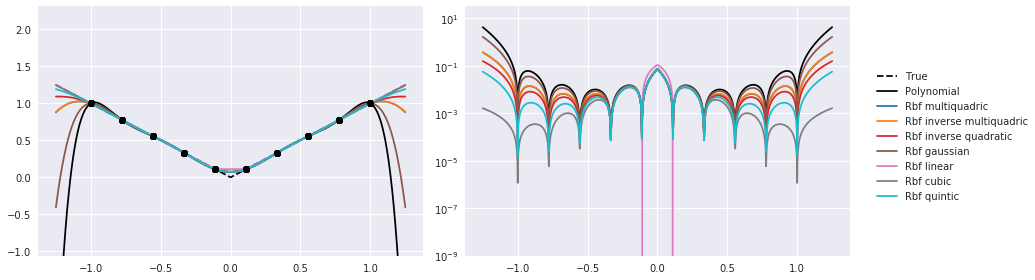

In [4]:
make_Rbf_plots(lambda x : np.abs(x), n=10, rand=False)

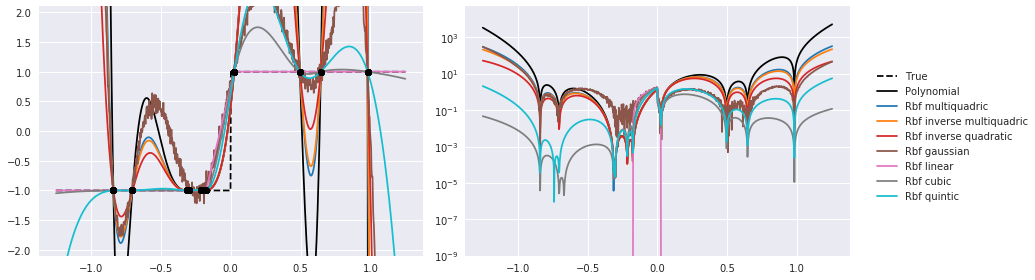

In [5]:
make_Rbf_plots(lambda x : np.sign(x), n=10, rand=True)

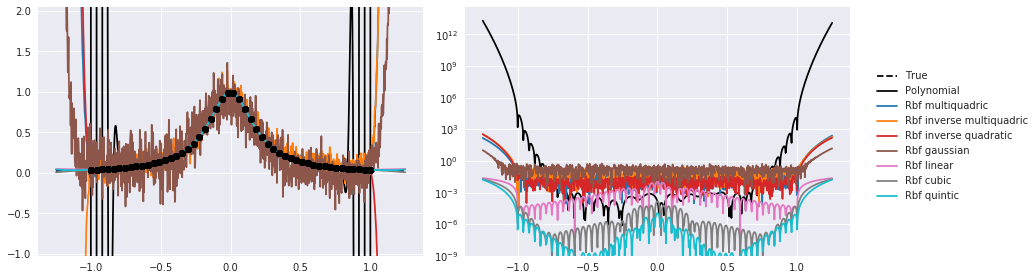

In [6]:
make_Rbf_plots(lambda x : 1.0/(1.0+25.0*x**2), n=50, rand=False)

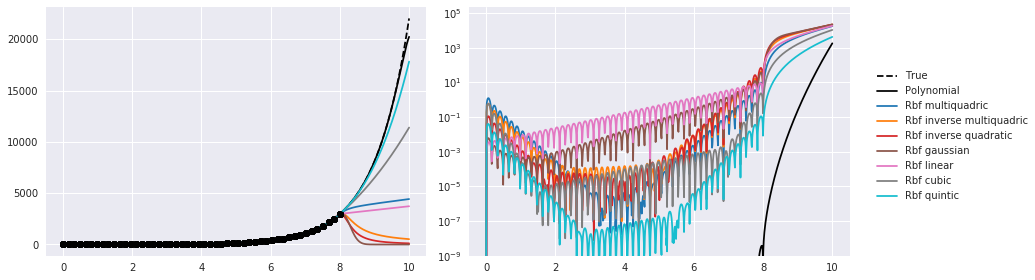

In [7]:
make_Rbf_plots(lambda x : np.exp(x), interval=[0,8], n=50, rand=False)

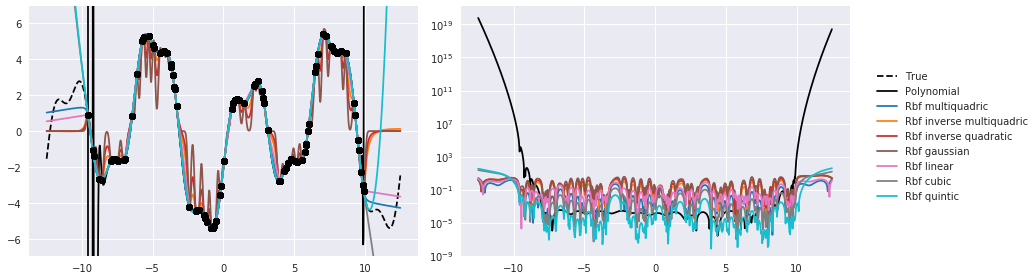

In [8]:
make_Rbf_plots(lambda x : 4*np.sin(x)-2*np.cos(0.5*x)+np.sin(3*x), interval=[-10,10], n=100, rand=True)

## Timing

Now we'll try timing our methods. First we need the `time` module.

In [9]:
import time

First we'll try a large problem. `Polyinterp` can't handle it.

In [12]:
g = lambda x : 4*np.sin(x)-2*np.cos(0.5*x)+np.sin(3*x)
x = np.linspace(-10,10,1e3)
t = time.time()
p = Polyinterp(x, g(x))
elapsed = time.time()-t
print('Time\t\t\tAbsolute error\t\tMethod')
print('=====================================================================')
print(str(elapsed)+'\t'+str(np.max(np.abs(p(x)-g(x))))+'\t\t\tPolynomial')
for function in functions:
    t = time.time()
    r = Rbf(x, g(x), function=function)
    elapsed = time.time()-t
    print(str(elapsed)+'\t'+str(np.max(np.abs(r(x)-g(x))))+'\tRbf '+function)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/af0/narc/narcpack/narcpack/interp/Polyinterp.py:16: RuntimeWarning: overflow encountered in power
  V[:,i] = x**i


Time			Absolute error		Method
2.063464641571045	nan			Polynomial
1.8359558582305908	4.538991404956505e-10	Rbf multiquadric
1.8122327327728271	1.1929124354992382e-11	Rbf inverse multiquadric
1.7913873195648193	5.013323089997357e-12	Rbf inverse quadratic
1.6996822357177734	0.03188497292564296	Rbf gaussian
1.4441916942596436	1.580957587066223e-13	Rbf linear
2.519704580307007	1.8992398764794416e-09	Rbf cubic
3.6150009632110596	3.5104507949412778e-06	Rbf quintic


Now let's take the minimum timing over a bunch of small problems.

In [25]:
g = lambda x : 4*np.sin(x)-2*np.cos(0.5*x)+np.sin(3*x)
x = np.linspace(-4,4,20)
elapsed = np.Inf
for i in range(1000):
    t = time.time()
    p = Polyinterp(x, g(x))
    elapsed = np.min([elapsed,time.time()-t])
print('Time\t\t\tMethod')
print('=============================================')
print(str(elapsed)+'\tPolynomial')
for function in functions:
    elapsed = np.Inf
    for i in range(1000):
        t = time.time()
        r = Rbf(x, g(x), function=function)
        elapsed = np.min([elapsed,time.time()-t])
    print(str(elapsed)+'\tRbf '+function)

Time			Method
0.000125885009765625	Polynomial
0.0002918243408203125	Rbf multiquadric
0.00032520294189453125	Rbf inverse multiquadric
0.0004813671112060547	Rbf inverse quadratic
0.00043511390686035156	Rbf gaussian
0.00018906593322753906	Rbf linear
0.00029778480529785156	Rbf cubic
0.00029778480529785156	Rbf quintic
